1. Data Collection
Data Source
The Data Source for the current project is taken from the Kaggle repository with the following link
https://www.kaggle.com/datasets/agsam23/german-credit?select=german_credit_data.csv

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:\Python\german_credit_data.csv")
df


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


2.Data Pre-processing Here the data is cheked for duplicates, missing values, filling of the missing values, data types etc.

In [97]:
#finding missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [98]:
#showing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [99]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

3. Exploratory Data Analysis

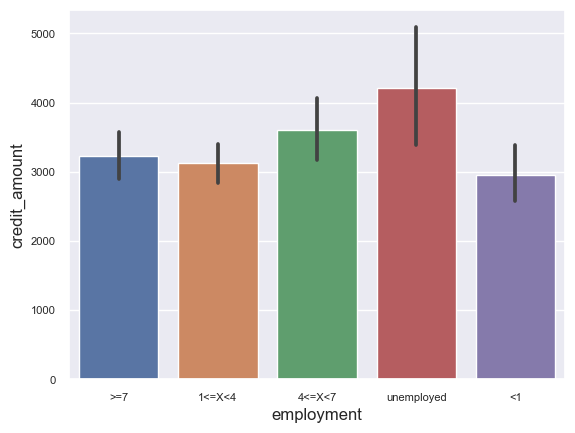

In [100]:
#EDA
import seaborn as sb
sb.barplot(x = 'employment',y = 'credit_amount' , data= df)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

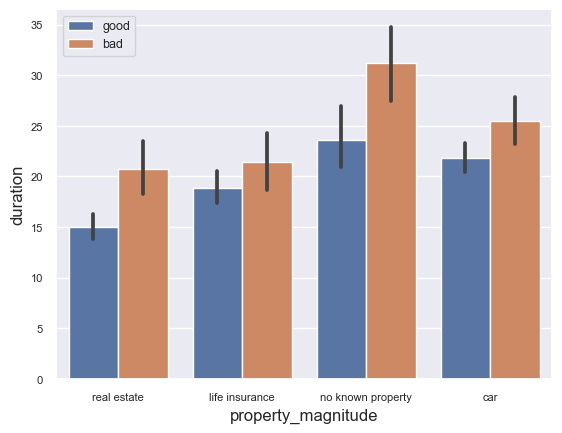

In [101]:
sb.barplot(y = 'duration',x = 'property_magnitude' , data= df,hue='class')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='upper left',fontsize=9)
plt.show()

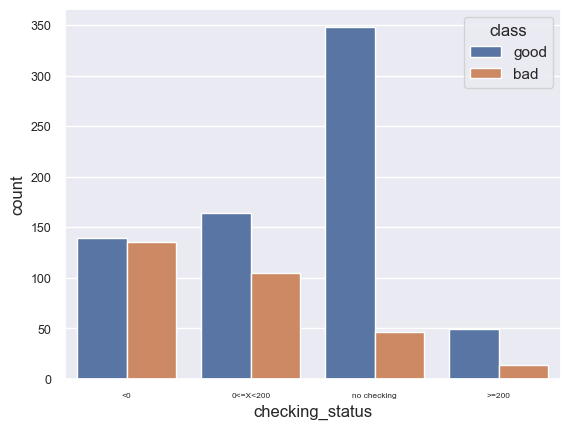

In [102]:
sb.countplot(data = df, x='checking_status', hue = 'class')

plt.xticks(fontsize=6)
plt.yticks(fontsize=9)
plt.show()

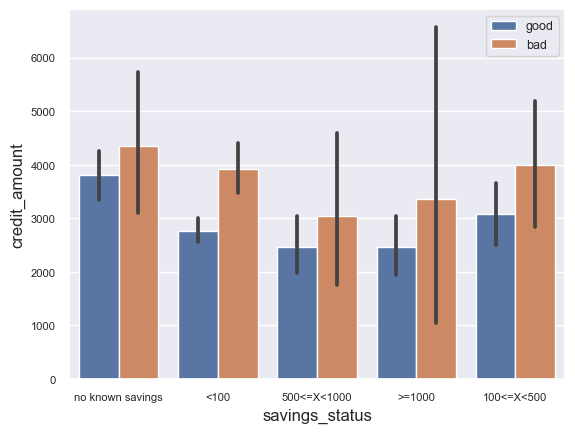

In [103]:
sb.set(style="darkgrid")
sb.barplot(y= 'credit_amount',x ='savings_status',data = df,hue= 'class')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='upper right',fontsize=9)
plt.show()

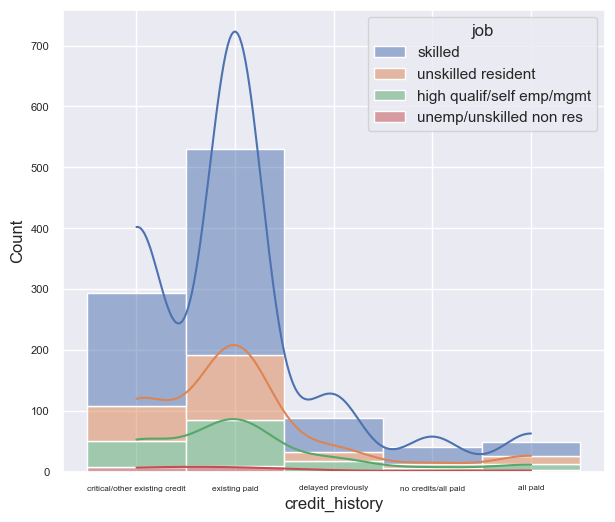

In [104]:
fig, ax = plt.subplots(figsize=(7, 6))
sb.histplot(data = df, x='credit_history', kde = True, hue = 'job',multiple="stack")

plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
plt.show()

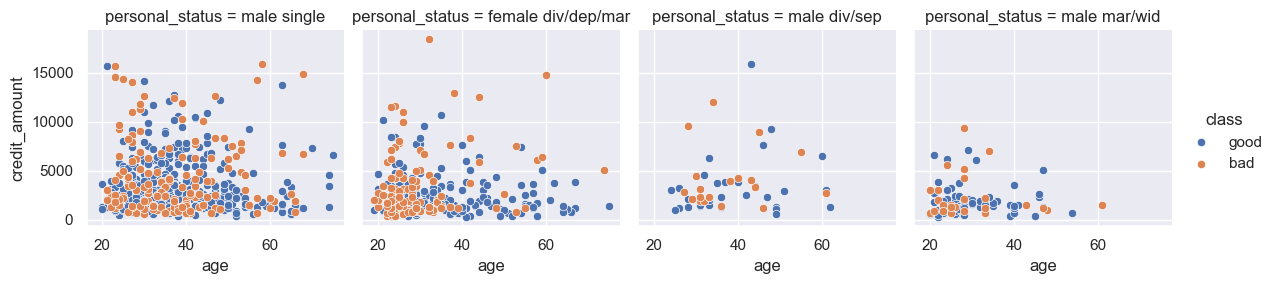

In [105]:
g = sb.FacetGrid(df, col="personal_status", hue='class')
g.map_dataframe(sb.scatterplot, x="age", y="credit_amount")
g.add_legend()

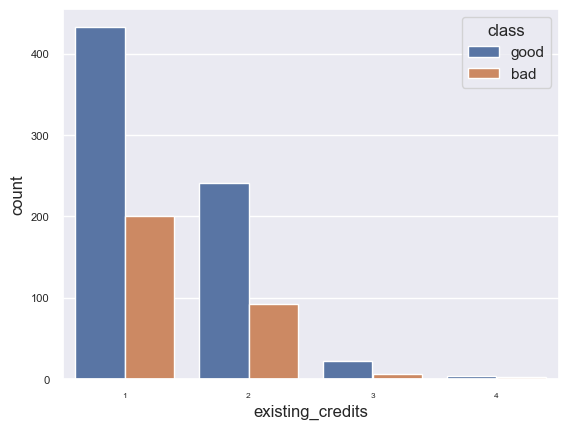

In [106]:
sb.countplot(data = df, x='existing_credits', hue = 'class')

plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
plt.show()

4. Converting the categorical data into numerical using the dummy variable

In [107]:
df= df.rename(columns={'class': 'label'})
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,label
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [108]:
[df.select_dtypes(['object']).columns]

[Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker', 'label'],
       dtype='object')]

In [109]:
#converting all categorical columns into numerical using onehotencoder
df=pd.get_dummies(df,columns=['checking_status', 'credit_history', 'purpose', 'savings_status',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker', 'label'],drop_first=True,dtype=int)
df = pd.DataFrame(df)
df.tail(10)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes,label_good
990,12,3565,2,1,37,2,2,0,0,1,...,1,0,1,0,0,0,1,0,1,1
991,15,1569,4,4,34,1,2,0,0,1,...,0,0,1,0,0,0,1,0,1,1
992,18,1936,2,4,23,2,1,1,0,0,...,1,0,0,1,0,0,1,0,1,1
993,36,3959,4,3,30,1,1,1,0,0,...,1,0,1,0,0,0,0,1,1,1
994,12,2390,4,3,50,1,1,0,0,1,...,1,0,1,0,1,0,0,1,1,1
995,12,1736,3,4,31,1,1,0,0,1,...,1,0,1,0,0,0,1,0,1,1
996,30,3857,4,4,40,1,1,1,0,0,...,1,0,1,0,0,0,0,1,1,1
997,12,804,4,4,38,1,1,0,0,1,...,1,0,1,0,1,0,0,0,1,1
998,45,1845,4,4,23,1,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
999,45,4576,3,4,27,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,1


5.Feature selection: Out of the all the independent variables it's very important to find out the features that has relevant impact on the dependent variable from a larger set of features to improve the performance of a model or reduce its complexity. The p-value can be used as a criterion to decide whether to include or exclude a feature from the model

Features with p-value <= 0.05 are chosen for model creation as it rejects the null hypothesis

In [110]:
x = df.drop(['label_good'],axis = 1)
y = df['label_good']


In [111]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             label_good   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              70.36
Date:                Mon, 22 Jul 2024   Prob (F-statistic):                   6.89e-277
Time:                        20:43:16   Log-Likelihood:                         -483.29
No. Observations:                1000   AIC:                                      1063.
Df Residuals:                     952   BIC:                                      1298.
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
duration                                         -0.0043      0.002     -2.843      0.005      -0.007      -0.001
credit_amount                                  -1.32e-05   7.11e-06     -1.856      0.064   -2.72e-05    7.58e-07
installment_commitment                           -0.0325      0.013     -2.487      0.013      -0.058      -0.007
residence_since                                   0.0091      0.013      0.690      0.490      -0.017       0.035
age                                               0.0030      0.001      2.261      0.024       0.000       0.006
existing_credits                                 -0.0187      0.028     -0.669      0.503      -0.073       0.036
num_dependents                                    0.0109      0.037      0.296      0.768      -0.062       0.084
checking_status_<0                               -0.0695      0.037     -1.875      0.061      -0.142       0.003
checking_status_>=200                             0.1363      0.058      2.347      0.019       0.022       0.250
checking_status_no checking                       0.2025      0.034      5.968      0.000       0.136       0.269
credit_history_critical/other existing credit     0.3221      0.069      4.675      0.000       0.187       0.457
credit_history_delayed previously                 0.2628      0.076      3.472      0.001       0.114       0.411
credit_history_existing paid                      0.2310      0.061      3.770      0.000       0.111       0.351
credit_history_no credits/all paid                0.0804      0.090      0.896      0.371      -0.096       0.256
purpose_domestic appliance                       -0.0038      0.126     -0.030      0.976      -0.252       0.244
purpose_education                                -0.0958      0.073     -1.305      0.192      -0.240       0.048
purpose_furniture/equipment                       0.0654      0.053      1.231      0.219      -0.039       0.170
purpose_new car                                  -0.0637      0.051     -1.261      0.208      -0.163       0.035
purpose_other                                     0.2460      0.128      1.927      0.054      -0.005       0.496
purpose_radio/tv                                  0.0622      0.050      1.246      0.213      -0.036       0.160
purpose_repairs                                  -0.0589      0.097     -0.604      0.546      -0.250       0.132
purpose_retraining                                0.1817      0.144      1.259      0.209      -0.102       0.465
purpose_used car                                  0.1643      0.060      2.726      0.007       0.046       0.283
savings_status_500<=

In [112]:
features = x.columns[model.pvalues <=0.05]
features

Index(['duration', 'installment_commitment', 'age', 'checking_status_>=200',
       'checking_status_no checking',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'purpose_used car', 'employment_4<=X<7', 'personal_status_male single',
       'other_parties_guarantor', 'other_parties_none',
       'other_payment_plans_none'],
      dtype='object')

In [113]:
x1 = df[features]
y1 = df['label_good']

import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = sm.OLS(y1,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             label_good   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              226.6
Date:                Mon, 22 Jul 2024   Prob (F-statistic):                   2.85e-296
Time:                        20:43:24   Log-Likelihood:                         -520.96
No. Observations:                1000   AIC:                                      1070.
Df Residuals:                     986   BIC:                                      1139.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
duration                                         -0.0059      0.001     -5.434      0.000      -0.008      -0.004
installment_commitment                           -0.0166      0.011     -1.460      0.145      -0.039       0.006
age                                               0.0033      0.001      3.021      0.003       0.001       0.005
checking_status_>=200                             0.1971      0.055      3.573      0.000       0.089       0.305
checking_status_no checking                       0.2776      0.028      9.845      0.000       0.222       0.333
credit_history_critical/other existing credit     0.3159      0.050      6.354      0.000       0.218       0.413
credit_history_delayed previously                 0.2550      0.061      4.190      0.000       0.136       0.374
credit_history_existing paid                      0.2406      0.045      5.328      0.000       0.152       0.329
purpose_used car                                  0.1248      0.044      2.837      0.005       0.038       0.211
employment_4<=X<7                                 0.0953      0.035      2.754      0.006       0.027       0.163
personal_status_male single                       0.0690      0.027      2.518      0.012       0.015       0.123
other_parties_guarantor                           0.4395      0.074      5.939      0.000       0.294       0.585
other_parties_none                                0.2351      0.051      4.618      0.000       0.135       0.335
other_payment_plans_none                          0.0993      0.034      2.930      0.003       0.033       0.166
==============================================================================
Omnibus:                       69.990   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.739
Skew:                          -0.473   Prob(JB):                     2.14e-12
Kurtosis:                       2.372   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
new_features = x1.columns[model1.pvalues <=0.05]
new_features

Index(['duration', 'age', 'checking_status_>=200',
       'checking_status_no checking',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'purpose_used car', 'employment_4<=X<7', 'personal_status_male single',
       'other_parties_guarantor', 'other_parties_none',
       'other_payment_plans_none'],
      dtype='object')

In [115]:
x2 = df[new_features]
y2 = df['label_good']

import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = sm.OLS(y2,x2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             label_good   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              243.6
Date:                Mon, 22 Jul 2024   Prob (F-statistic):                   5.17e-297
Time:                        20:43:30   Log-Likelihood:                         -522.04
No. Observations:                1000   AIC:                                      1070.
Df Residuals:                     987   BIC:                                      1134.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
duration                                         -0.0062      0.001     -5.800      0.000      -0.008      -0.004
age                                               0.0030      0.001      2.814      0.005       0.001       0.005
checking_status_>=200                             0.1994      0.055      3.616      0.000       0.091       0.308
checking_status_no checking                       0.2766      0.028      9.806      0.000       0.221       0.332
credit_history_critical/other existing credit     0.3058      0.049      6.208      0.000       0.209       0.402
credit_history_delayed previously                 0.2492      0.061      4.102      0.000       0.130       0.368
credit_history_existing paid                      0.2304      0.045      5.160      0.000       0.143       0.318
purpose_used car                                  0.1338      0.044      3.072      0.002       0.048       0.219
employment_4<=X<7                                 0.0953      0.035      2.753      0.006       0.027       0.163
personal_status_male single                       0.0640      0.027      2.354      0.019       0.011       0.117
other_parties_guarantor                           0.4187      0.073      5.763      0.000       0.276       0.561
other_parties_none                                0.2144      0.049      4.383      0.000       0.118       0.310
other_payment_plans_none                          0.0968      0.034      2.858      0.004       0.030       0.163
==============================================================================
Omnibus:                       74.199   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.903
Skew:                          -0.481   Prob(JB):                     7.26e-13
Kurtosis:                       2.355   Cond. No.                         298.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
#splitting the dataset into training and test model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,train_size = 0.75)

In [117]:
#creating the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
model = LogisticRegression()
model.fit(x_train,y_train)
Y_prediction = model.predict(x_test)
Y_prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [118]:
# import all the metrics 
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
 
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, Y_prediction)
conf_matrix

array([[ 28,  49],
       [ 13, 160]], dtype=int64)

In [119]:
#model evaluation
accuracy = accuracy_score(y_test, Y_prediction)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test,  Y_prediction)
print(f"Precision = {precision}")
recall = recall_score(y_test,  Y_prediction)
print(f"Recall = {recall}")
f1score = f1_score(y_test,  Y_prediction)
print(f"F1 Score = {f1score}")

Accuracy = 0.752
Precision = 0.7655502392344498
Recall = 0.9248554913294798
F1 Score = 0.837696335078534


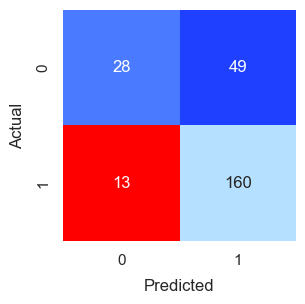

In [120]:
plt.figure(figsize=(3,3))
sb.set(font_scale = 1)
 
ax = sb.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=8)
ax.set_ylabel("Actual", labelpad=8)
plt.show()

In [121]:
#using random forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

# Predicting the test set results
model1 = clf.predict(x_test)
model1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [122]:
#model evaluation
accuracy = accuracy_score(y_test, model1)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test,model1)
print(f"Precision = {precision}")
recall = recall_score(y_test,model1)
print(f"Recall = {recall}")
f1score = f1_score(y_test,model1)
print(f"F1 Score = {f1score}")

Accuracy = 0.724
Precision = 0.7795698924731183
Recall = 0.838150289017341
F1 Score = 0.8077994428969358


Hyperparameter tuning using gridsearchcv

In [123]:
# Number of trees in random forest - n_estimators
# Maximum number of levels in tree - max_depth 
# Number of features to consider at every split - max_features 
# Method of selecting samples for training each tree- bootstrap 

params={'n_estimators':[100,200,300],
       'criterion':['gini','entropy'],
       'max_depth':[None,5,10,15,20],
       'max_features':['sqrt', 'log2', None],
       'bootstrap' : [True, False]}

rf_Grid = GridSearchCV(estimator = clf, param_grid = params, cv = None, verbose=0, n_jobs = -1)
rf_Grid.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [124]:
print(rf_Grid.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [90]:
print(rf_Grid.best_score_)

0.7493333333333332


In [125]:
clf1 = RandomForestClassifier(bootstrap = True, criterion='entropy', max_depth = 10, max_features = 'sqrt', n_estimators = 300)
clf1.fit(x_train,y_train)
model2 = clf1.predict(x_test)
model2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [126]:
#model evaluation
accuracy = accuracy_score(y_test, model2)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test,model2)
print(f"Precision = {precision}")
recall = recall_score(y_test,model2)
print(f"Recall = {recall}")
f1score = f1_score(y_test,model2)
print(f"F1 Score = {f1score}")

Accuracy = 0.724
Precision = 0.7549019607843137
Recall = 0.8901734104046243
F1 Score = 0.8169761273209548


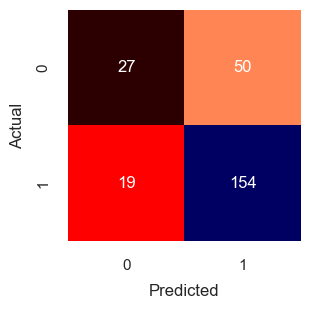

In [132]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, model2)

plt.figure(figsize=(3,3))
sb.set(font_scale = 1)
 
ax = sb.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=8)
ax.set_ylabel("Actual", labelpad=8)
plt.show()

In [130]:
# predict probabilities

pred_prob1 = model.predict_proba(x_test)
pred_prob2 = clf1.predict_proba(x_test)


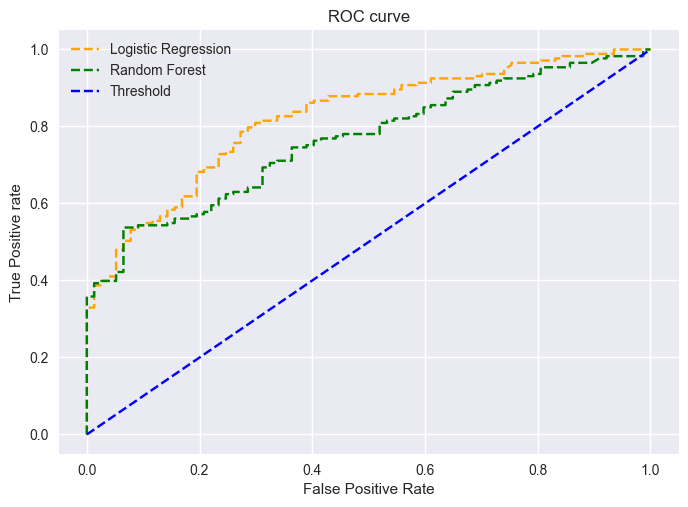

In [131]:


#roc curve
from sklearn import metrics
from sklearn.metrics import roc_curve

#ROC curve for TPR=FPR

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'Threshold')

plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=200)
plt.show()